# importing libraries

In [26]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Data Collection & Processing

In [29]:
exer = pd.read_csv('exercise.csv')

In [30]:
exer.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [31]:
cal = pd.read_csv('calories.csv')

In [32]:
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [33]:
calories_data=pd.concat([exer,cal['Calories']],axis=1)

In [34]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [35]:
calories_data.shape

(15000, 9)

In [36]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [37]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

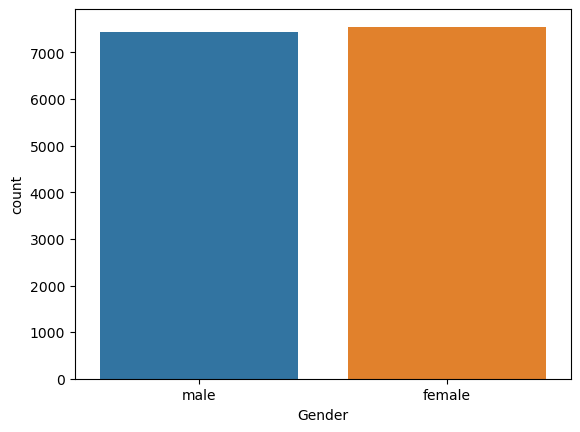

In [38]:
sns.countplot(x ='Gender' ,data = calories_data)

C:\Users\HP\AppData\Local\Temp\ipykernel_19056\2730867274.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'],kde=False, color='Blue' )


<Axes: xlabel='Age'>

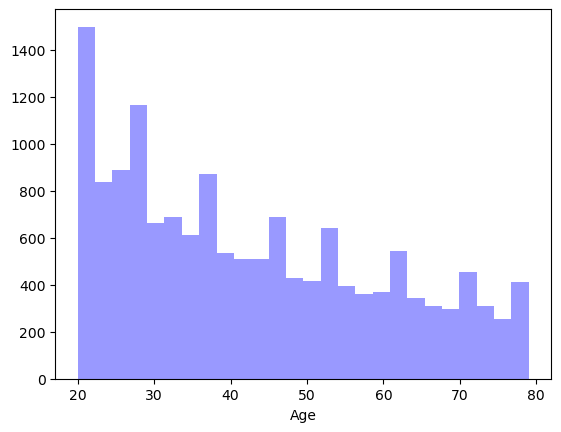

In [39]:
sns.distplot(calories_data['Age'],kde=False, color='Blue' )

In [40]:
calories_data[calories_data['Age']<30]['Age'].count()

4387

C:\Users\HP\AppData\Local\Temp\ipykernel_19056\3783839960.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'],kde=False,color='red')


<Axes: xlabel='Height'>

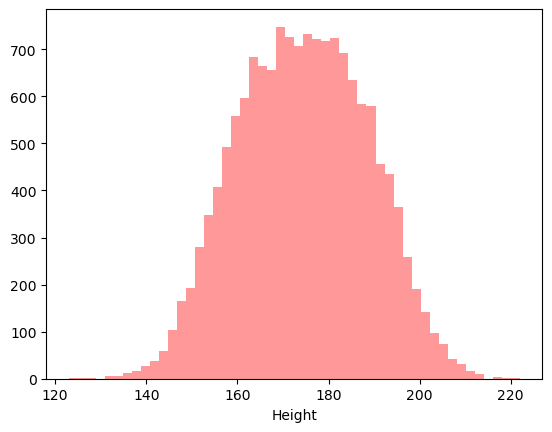

In [41]:
sns.distplot(calories_data['Height'],kde=False,color='red')

C:\Users\HP\AppData\Local\Temp\ipykernel_19056\1539919118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

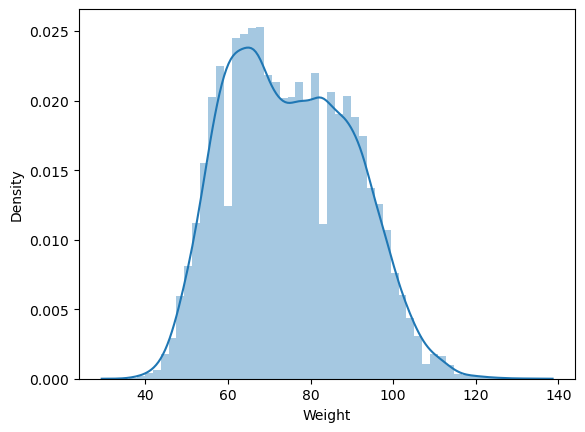

In [42]:
sns.distplot(calories_data['Weight'])

In [43]:
correlation=calories_data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_19056\3605353256.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=calories_data.corr()


<Axes: >

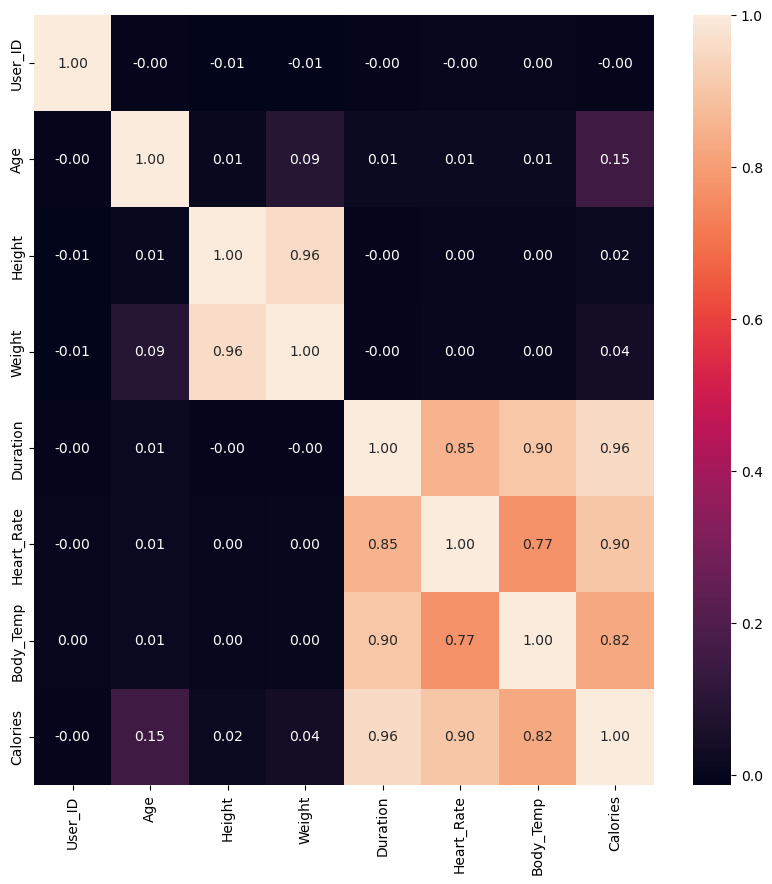

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,fmt='.2f',)

In [45]:
calories_data.drop(columns=['Height','User_ID'],axis=1,inplace=True)

In [46]:
calories_data.head()

,Gender,Age,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,94.0,29.0,105.0,40.8,231.0
1,female,20,60.0,14.0,94.0,40.3,66.0
2,male,69,79.0,5.0,88.0,38.7,26.0
3,female,34,71.0,13.0,100.0,40.5,71.0
4,female,27,58.0,10.0,81.0,39.8,35.0


In [47]:
from sklearn.preprocessing import LabelEncoder


In [48]:
lb=LabelEncoder()
calories_data['Gender']=lb.fit_transform(calories_data['Gender'])

In [49]:
calories_data.head()

,Gender,Age,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,94.0,29.0,105.0,40.8,231.0
1,0,20,60.0,14.0,94.0,40.3,66.0
2,1,69,79.0,5.0,88.0,38.7,26.0
3,0,34,71.0,13.0,100.0,40.5,71.0
4,0,27,58.0,10.0,81.0,39.8,35.0


In [50]:
calories_data['Gender'].value_counts()

0    7553
1    7447
Name: Gender, dtype: int64

# Training and Testing

In [51]:
x=calories_data.drop(columns='Calories')
y=calories_data['Calories']

In [52]:
x.head()

,Gender,Age,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,94.0,29.0,105.0,40.8
1,0,20,60.0,14.0,94.0,40.3
2,1,69,79.0,5.0,88.0,38.7
3,0,34,71.0,13.0,100.0,40.5
4,0,27,58.0,10.0,81.0,39.8


In [53]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [55]:
x_train.shape

(12000, 6)

In [56]:
x_test.shape

(3000, 6)

# Training the Model 

In [57]:
model=XGBRegressor()

In [58]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [59]:
predicted=model.predict(x_test)

In [60]:
metrics.mean_absolute_error(predicted,y_test)

1.4603707520663738

In [62]:
import pickle
fil=open('caloriespred.pkl','wb')
pickle.dump(model,fil)